In [ ]:
# default_exp core

# Core functions

> API details.

In [ ]:
# hide
from nbdev.showdoc import *
from fastcore.test import *

In [ ]:
#export
from fastcore.all import *
from fastai2.basics import *
import pandas as pd

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
#export

def _no_emp_dim(x): 
    if x.shape[0]==1 and len(x.shape)>1:
        x=x[0,:]
    return x

def show_graph(array, ax=None, figsize=None, title=None, ctx=None, y=None, tx=None, ty=None, y_hat=None, **kwargs):
    "Show an array on `ax`."
    # Handle pytorch axis order
    if hasattrs(array, ('data','cpu','permute')):
        array = array.data.cpu()
    elif not isinstance(array,np.ndarray): 
        array=array(array)
    ax = ifnone(ax,ctx)
    if figsize is None: figsize = (5,5)
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    array =  _no_emp_dim(array)
    tx = ifnone(tx,np.arange(len(array)))
    ax.plot(tx, array, '-*b', **kwargs)
    if y is not None or y_hat is not None:
        y = _no_emp_dim(y)  
        ty = ifnone(ty,np.arange(len(array),len(array)+len(y)))
        if y is not None:     
            ax.plot(ty, y,'-*g' ,label='target', **kwargs)
        if y_hat is not None:
            y_hat = _no_emp_dim(y_hat) 
            ax.plot(ty, y_hat,'*r',label='pred', **kwargs)
        
    if title is not None: ax.set_title(title)
#     ax.axis('off')
    return ax

tensor([10, 11, 12])
tensor([[10, 11, 12]])


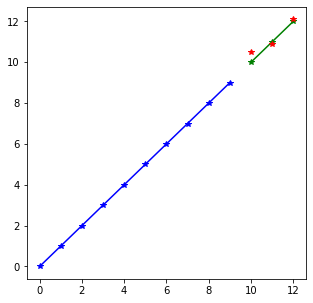

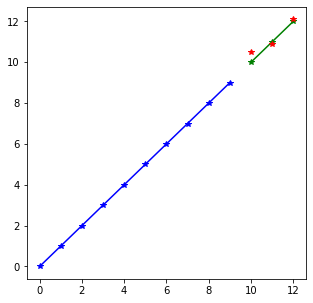

In [ ]:
# hide
a = tensor(np.arange(10))
y = tensor([10, 11, 12])
y_= tensor([10.5,10.9,12.1])

ax = show_graph(a, y = y, y_hat = y_)

test_graph_exists(ax)

a = tensor(np.arange(10))[None,:]
y = tensor([10, 11, 12])[None,:]
y_= tensor([10.5,10.9,12.1])[None,:]
ax = show_graph(a, y = y, y_hat = y_)

test_graph_exists(ax)

show_graph can show an array...

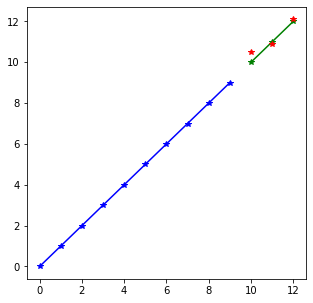

In [ ]:
a = np.arange(10)
y = np.array([10, 11, 12])
y_= np.array([10.5,10.9,12.1])
ax = show_graph(a, y = y, y_hat = y_)

In [ ]:
#export
def show_xy_graph(o, **kwargs):
    "Call `show_graph` destructuring `o` to `(array,y)`"
    show_graph(o[0], y=o[1], **kwargs)

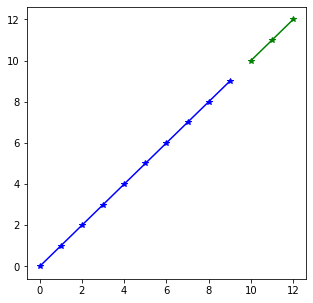

In [ ]:
show_xy_graph((a,y))

In [ ]:
#export
def show_xyy_graph(o, **kwargs):
    "Call `show_graph` destructuring `o` to `(array,y,y_hat)`"
    show_graph(o[0], y=o[1], y_hat=o[2], **kwargs)

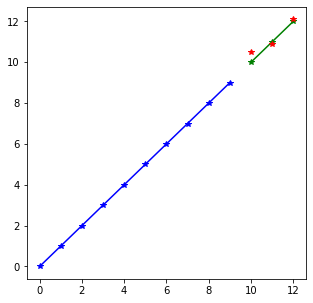

In [ ]:
show_xyy_graph((a,y,y_))

In [ ]:
# export
def test_graph_exists(ax):
    "Test there is a graph displayed in `ax`"
    assert ax 

In [ ]:
#export
@delegates(subplots)
def show_graphs(arrays, rows=1, titles=None, **kwargs):
    "Show all images `arrays` as subplots with `rows` using `titles`"
    cols = int(math.ceil(len(arrays)/rows))
    if titles is None: titles = [None]*len(arrays)
    axs = subplots(rows,cols,**kwargs)[1].flat
    for a,t,ax in zip(arrays, titles, axs): 
        show_xy_graph(a, ax=ax, title=t)

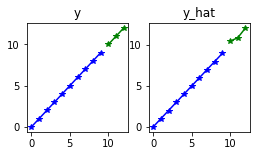

In [ ]:
show_graphs(((a,y),(a,y_)), titles=('y','y_hat'), imsize=2)

In [ ]:
# export
class TensorSeq(TensorBase): 
    def show(self, ctx=None, **kwargs):
        return show_graph(self, ctx=ctx, **kwargs)

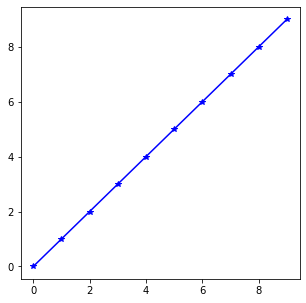

In [ ]:
ax = TensorSeq(np.arange(10)).show()

In [ ]:
# hide
test_graph_exists(ax)

In [ ]:
#export
def show_graph_batch(b, show=show_titled_image, items=9, cols=3, figsize=None, **kwargs):
    "Display batch `b` in a grid of size `items` with `cols` width"
    if items<cols: cols=items
    rows = (items+cols-1) // cols
    if figsize is None: figsize = (cols*3, rows*3)
    fig,axs = plt.subplots(rows, cols, figsize=figsize)
    for *o,ax in zip(*to_cpu(b), axs.flatten()): 
        show_xy_graph(o, ax=ax, **kwargs)

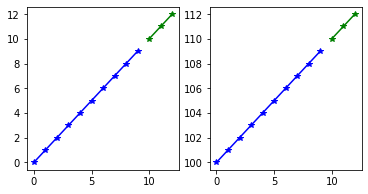

In [ ]:
show_graph_batch(([np.arange(10),np.arange(100,110)],[np.array([10,11,12]),np.array([110,111,112])]), items=2)

## Utils

In [ ]:
# export
def skip(x,percentage = .9):
    if (np.random.rand() > percentage or x == 0):
        return False
    return True


In [ ]:
# hide
# s = skip(.9)
# l = L()
# for i in range(1000):
#     if s(i):
#         l.append(i)        
# assert is_close(len(l)/1000,.9,.01)

# Preprocces functions

## M4

In [ ]:
# export
def ts_lists(ts:np.ndarray)-> L:
    """Transforms a `np.ndarray` of shape (timeseries, max_time) to a list of timeseries with shape (1,time).
    
    where:
    
    max_time = the length of the longest timeserie
    
    time = the length of the non-nan values of that specific timeserie    
    """
    lst = L()
    for time_series in ts:
        lst.append(time_series[~np.isnan(time_series)][None,:])
    return lst

In [ ]:
# hide
ts = np.array([np.arange(0,10.),
               np.arange(0,10.)
              ])
ts[1,-1] = np.NaN

r = ts_lists(ts)
test_eq(r[0],np.arange(0,10.)[None,:])
test_eq(r[1],np.arange(0,9.)[None,:])
test_eq(r[0].shape,(1,10))

In [ ]:
ts

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., nan]])

In [ ]:
ts_lists(ts)

(#2) [array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]]),array([[0., 1., 2., 3., 4., 5., 6., 7., 8.]])]

## Gas-usage


In [ ]:
# export 
class ToElapsed():
    changed = False    
    def __call__(self, s):
        if pd.api.types.is_datetime64_any_dtype(s.dtype):            
            self.changed = True
            return s.astype(np.int64) // 10 ** 9
        return s
    
    def decode(self, s):
        if self.changed:    
            return pd.Series(pd.to_datetime(s *(10 ** 9)))
        return s
    

In [ ]:
# hide
s = pd.Series([pd.Timestamp('1970')+pd.Timedelta(hours=1)*x for x in range(3)])

In [ ]:
s

0   1970-01-01 00:00:00
1   1970-01-01 01:00:00
2   1970-01-01 02:00:00
dtype: datetime64[ns]

In [ ]:
tmf = ToElapsed()
tmf(s)

0       0
1    3600
2    7200
dtype: int64

In [ ]:
tmf.decode(tmf(s))

0   1970-01-01 00:00:00
1   1970-01-01 01:00:00
2   1970-01-01 02:00:00
dtype: datetime64[ns]

In [ ]:
# hide
test_eq(tmf(s),
       np.arange(0,3600*3,3600))

test_eq(tmf.decode(pd.Series(np.arange(0,3600*3,3600))).values,s.values)
test_eq_type(tmf.decode(pd.Series(np.arange(0,3600*3,3600))), s)

In [ ]:
# hide
tmf = ToElapsed()
test_eq(tmf(pd.Series(np.arange(0,3600*3,3600))),
       np.arange(0,3600*3,3600))

test_eq(tmf.decode(pd.Series(np.arange(0,3600*3,3600))),
       np.arange(0,3600*3,3600))

In [ ]:
# export
def make_interval(
    df: pd.DataFrame,
    to_split_col:str='datetime',
    interval=3600,
    max_splits=100000,
    callback_error=None,
) -> L(pd.DataFrame):
    """Will check if column `to_split_col` in `df` has interval size of `interval`, 
    if not will make it happen and return a list where this is done.
    
    This works both when type of `to_split_col` is numeric or `pd.Timestamp`
    
    """
    tmf = ToElapsed()
    df[to_split_col] = tmf(df[to_split_col])    
    df.index = df[to_split_col]
    df = df.sort_index()
    index = df.index.to_numpy()
    df["delta"] = abs(
        (df[to_split_col] - df[to_split_col].shift(1))
    )    
    mask = df["delta"] != interval
    starts = np.arange(len(mask))[mask]
    ends = list(starts[1:])+L(len(mask))
    
    del df["delta"]

    if len(ends) > max_splits:
        if callback_error:
            callback_error()
        raise Exception(
            f"number of splits {len(not_hour)} > {max_splits}: \n{not_hour}"
        )
#     print(starts,ends)
    dfs = L()
    for start, end in zip(starts, ends):
        _df = df.iloc[start: end,:]
        _df.loc[:,to_split_col] = tmf.decode(_df[to_split_col])
        dfs.append(_df)

    return dfs

In [ ]:
# hide
df_start = pd.DataFrame({'dt':np.arange(0,10),
                  'x':np.arange(0,10),
                  })
df_end = pd.DataFrame({'dt':np.arange(15,20),
                  'x':np.arange(0,5) ,
                  })
df = df_start.append(df_end)

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4
dt,0,1,2,3,4,5,6,7,8,9,15,16,17,18,19
x,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4


In [ ]:
r = make_interval(df,'dt',1)
r[0].T

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


dt,0,1,2,3,4,5,6,7,8,9
dt,0,1,2,3,4,5,6,7,8,9
x,0,1,2,3,4,5,6,7,8,9


In [ ]:
r[1].T

dt,15,16,17,18,19
dt,15,16,17,18,19
x,0,1,2,3,4


In [ ]:
# hide
r = make_interval(df,'dt',1)
test_eq(len(r),2)

test_eq(r[0],df_start)
test_eq(r[1],df_end)

test_eq(r[0].shape,df_start.shape)
test_eq(r[1].shape,df_end.shape)

In [ ]:
# hide
df_start = pd.DataFrame({'datetime':[pd.Timestamp('1970-01-01')+pd.Timedelta(hours=1)*x for x in range(48)],
                  'x':np.arange(0,48),
                  })
df_end = pd.DataFrame({'datetime':[pd.Timestamp('1970-01-04')+pd.Timedelta(hours=1)*x for x in range(24)],
                  'x':np.arange(0,24),
                  })
df = df_start.append(df_end)

r = make_interval(df,'datetime', 3600)
test_eq(len(r),2)

test_eq(r[0].values, df_start.values)
test_eq(r[1].values, df_end.values)

test_eq(r[0].shape,df_start.shape)
test_eq(r[1].shape,df_end.shape)


/home/tako/dev/env37/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
# export
def melted_ts_2_lists(ts:pd.DataFrame, melted_col_name:str, fn=noop, **kwargs)->L:
    dfs = L()
    for c in set(ts[melted_col_name]):
        _df = ts[ts[melted_col_name] == c]
        r = fn(_df,**kwargs)
        dfs += r
    return dfs

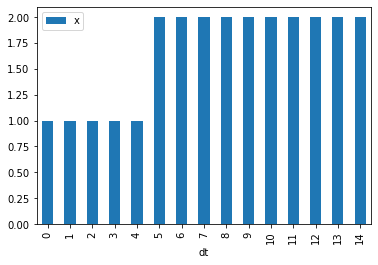

In [ ]:
df = pd.DataFrame({'dt':np.arange(0,15),
                  'x':L([1]*5) + L([2]*10),
                  })

df.plot(x='dt',y='x', kind='bar')

In [ ]:
r = melted_ts_2_lists(df,'x',to_split_col='dt',interval=1)
r[0].T

,0,1,2,3,4
dt,0,1,2,3,4
x,1,1,1,1,1


In [ ]:
r[1].T

,5,6,7,8,9,10,11,12,13,14
dt,5,6,7,8,9,10,11,12,13,14
x,2,2,2,2,2,2,2,2,2,2


In [ ]:
# hide
test_eq(type(r), type(L(0)))
test_eq(len(r), 2)

# test_eq_type(r[], df_end)

test_eq(r[0].shape, (5,2))
test_eq(r[1].shape, (10,2))

In [ ]:
# hide
df_start = pd.DataFrame({'dt':np.arange(0,15),
                         'x':L([1]*5) + L([2]*10),
                        })

df_end = pd.DataFrame({'dt':np.arange(20,25),                  
                       'x':L([1]*5) ,
                      })
df = pd.concat([df_start, df_end])

r = melted_ts_2_lists(df,'x',fn = make_interval, to_split_col='dt', interval=1)
test_eq(type(r), type(L(0)))
test_eq(len(r), 3)

test_eq_type(r[2], df_end)

test_eq(r[0].shape, (5,2))
test_eq(r[1].shape, (5,2))
test_eq(set(r[1]['x']), {1})
test_eq(r[2].shape, (10,2))
test_eq(set(r[2]['x']), {2})

/home/tako/dev/env37/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.external.ipynb.
This cell doesn't have an export destination and was ignored:
 
Converted 02_deep4cast_m4_example.ipynb.
Converted 03_data.load.ipynb.
Converted 04_data.transforms.ipynb.
Converted 05_models.wavenet.ipynb.
Converted 06_models.dnn.ipynb.
Converted 07_forecaster.ipynb.
Converted 08_metrics.ipynb.
Converted index.ipynb.
